In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [2]:
# Define the directory path where the files are located
directory_path = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/'

In [3]:
file_pattern = os.path.join(directory_path, 'profile*.data')
data_files = glob.glob(file_pattern)
print(data_files)

['/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile1.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile2.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile3.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile4.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile5.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile6.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile7.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile8.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years_nomaxtimestep_burning/profile

In [4]:
# Create a slider for file selection
file_slider = widgets.IntSlider(min=0, max=len(data_files)-1, step=1, description='File Index')
# Create an Output widget for the plot
plot_output = widgets.Output()

In [31]:
# Create a function to update the plot based on the file index
def update_plot(file_index):
    file = data_files[file_index]
    data = MesaData(file)

    with plot_output:
        clear_output(wait=True)
        figs, axs=plt.subplots(2,1,figsize=(6,6))
        axs[0].plot(10**data.logR[1:],np.log10(data.xq[1:]))
        axs[0].set_ylabel('Mass')
        axs[1].plot(10**data.logR, np.log10(data.he4))
        axs[1].set_ylabel('log10(he4)')
        axs[1].set_title('Composition')
        plt.xlabel('Radius')
        plt.title(f'Mass and composition vs. Radius for File: {os.path.basename(file)}')
        plt.show()

In [32]:
file_slider_output = widgets.interactive_output(update_plot, {'file_index': file_slider})


In [28]:
display(widgets.HBox([plot_output, file_slider]))


# History


Text(0.5, 0, 'log(Star Age)')

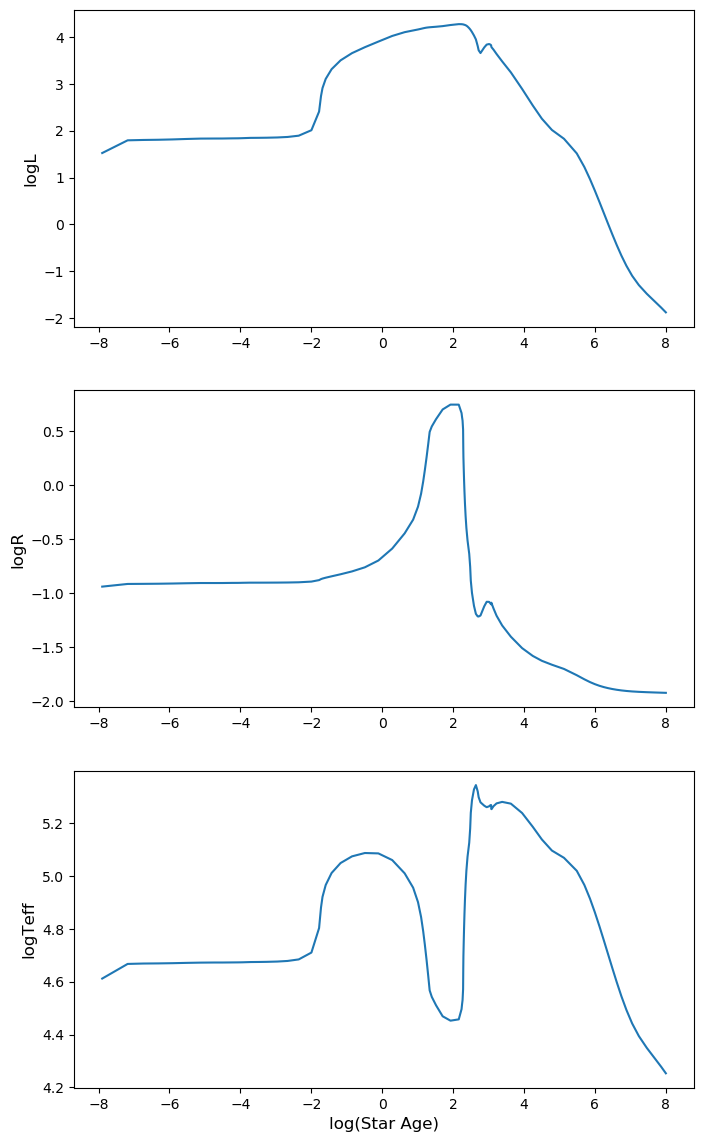

In [8]:
h = MesaData(os.path.join(directory_path, 'history.data'))
figs, axs=plt.subplots(3,1,figsize=(8,14))
axs[0].plot(np.log10(h.star_age), h.log_L)
axs[0].set_ylabel("logL",fontsize=12)
axs[1].plot(np.log10(h.star_age), h.log_R)
axs[1].set_ylabel("logR",fontsize=12)
axs[2].plot(np.log10(h.star_age), h.log_Teff)
axs[2].set_ylabel("logTeff",fontsize=12)

# set axis labels
plt.xlabel('log(Star Age)',fontsize=12)

# Composition

In [9]:
##h2 = np.genfromtxt('composition.dat',skip_header=1)
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
#plt.plot(h2[:,0],np.log10(h2[:,3]))
##plt.plot(h2[:,0],np.log10(h2[:,4]))
#plt.plot(h2[:,0],np.log10(h2[:,5]))
#plt.plot(h2[:,0],np.log10(h2[:,6]))
#plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'log$X_q$')
plt.ylabel(r'$X_n$')

AttributeError: xq